In [7]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img_array = cv2.imread("Training/0/Training_77874985.jpg")

In [9]:
img_array.shape

(48, 48, 3)

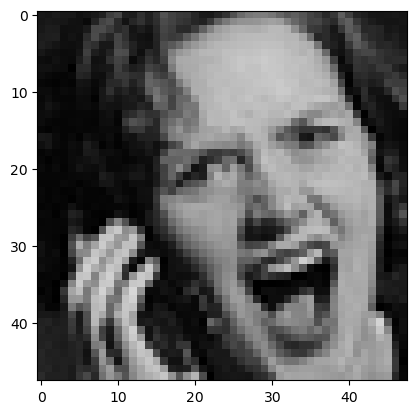

In [10]:
plt.imshow(img_array)

In [11]:
Datadirectory = "Training/"

In [12]:
Classes = ["0", "1", "2", "3", "4", "5", "6"]

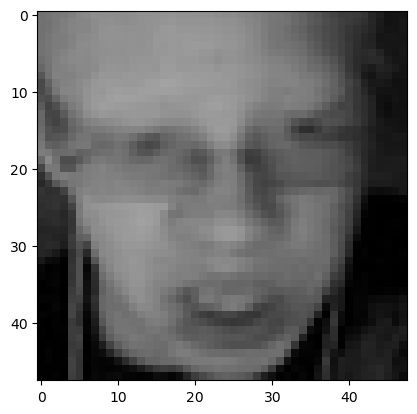

In [13]:
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

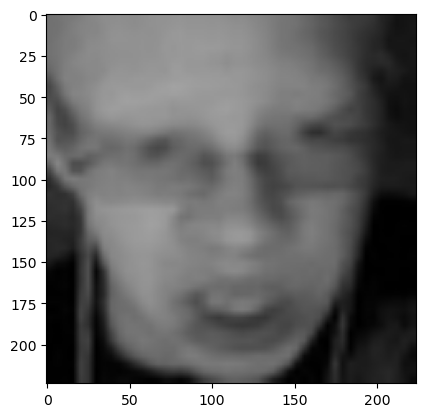

In [14]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
new_array.shape

(224, 224, 3)

## Read all the images and converting them to array

In [16]:
training_Data = []

In [17]:
def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_Data.append([new_array, class_num])
        except Exception as e:
            pass

In [18]:
create_training_Data()

In [19]:
print(len(training_Data))

6436


In [20]:
import random

random.shuffle(training_Data)

In [21]:
X = [] # Feature
y = [] # Label

for features, label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) # Convert it into 4 dimensions

In [22]:
X.shape

(6436, 224, 224, 3)

In [23]:
# Normalize the data
X = X/255.0;

In [24]:
type(y)

list

In [25]:
Y = np.array(y)

In [26]:
Y.shape # 6043 is the length of the labels array, because we have 6403 images in total

(6436,)

In [27]:
# del Y

## Transfer Learning

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model = tf.keras.applications.MobileNetV2() # Pre-Trained Model

In [30]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## Adding new layers

In [31]:
base_input = model.layers[0].input

In [32]:
base_output = model.layers[-2].output

In [33]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [34]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # Classes

In [35]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [36]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [37]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [37]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam", metrics=["accuracy"])

In [38]:
new_model.fit(X, Y, epochs = 25)

Epoch 1/25
202/202 [==============================] - 259s 1s/step - loss: 1.5242 - accuracy: 0.4147
Epoch 2/25
202/202 [==============================] - 249s 1s/step - loss: 1.2751 - accuracy: 0.5213
Epoch 3/25
202/202 [==============================] - 241s 1s/step - loss: 1.1418 - accuracy: 0.5743
Epoch 4/25
202/202 [==============================] - 237s 1s/step - loss: 1.0505 - accuracy: 0.6080
Epoch 5/25
202/202 [==============================] - 241s 1s/step - loss: 0.9768 - accuracy: 0.6370
Epoch 6/25
202/202 [==============================] - 239s 1s/step - loss: 0.8788 - accuracy: 0.6812
Epoch 7/25
202/202 [==============================] - 238s 1s/step - loss: 0.7978 - accuracy: 0.7077
Epoch 8/25
202/202 [==============================] - 239s 1s/step - loss: 0.7398 - accuracy: 0.7349
Epoch 9/25
202/202 [==============================] - 240s 1s/step - loss: 0.6654 - accuracy: 0.7590
Epoch 10/25
202/202 [==============================] - 241s 1s/step - loss: 0.5818 - accura

In [ ]:
new_model.save('emotion_detection.h5')

In [39]:
frame = cv2.imread("happyboy.jpg")

In [40]:
frame.shape

(612, 612, 3)

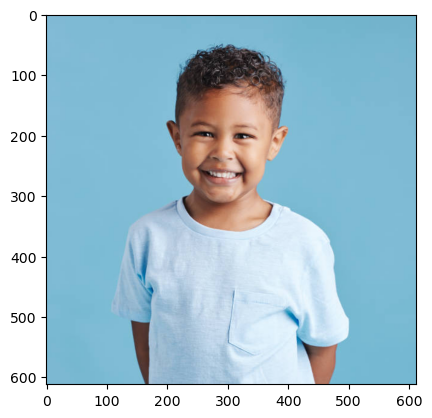

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
gray.shape

(612, 612)

In [47]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

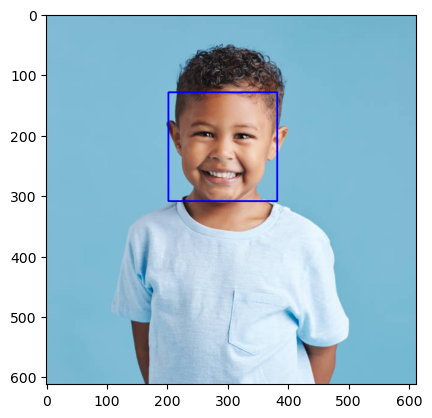

In [48]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

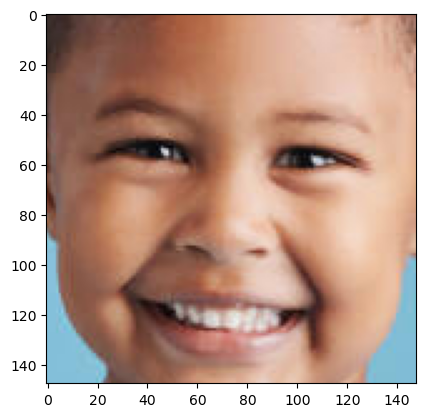

In [49]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [50]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0) ## Expand to fourth dimension
final_image = final_image/255.0 #Normalize

In [56]:
Predictions =  new_model.predict(final_image)

1/1 [==============================] - 1s 501ms/step


In [57]:
Predictions[0]

array([4.7390503e-07, 1.4954324e-07, 3.6138351e-06, 3.1009704e-02,
       9.6877563e-01, 3.4031196e-05, 1.7638986e-04], dtype=float32)

In [58]:
np.argmax(Predictions)

4